In [6]:
import pandas as pd

# Load processed data
X_train = pd.read_csv("../data/processed/train_scaled.csv")
X_test = pd.read_csv("../data/processed/test_scaled.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (455, 30)
Test shape: (114, 30)


In [7]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [8]:
from sklearn.metrics import accuracy_score

y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(accuracy_log, 4))


Logistic Regression Accuracy: 0.9825


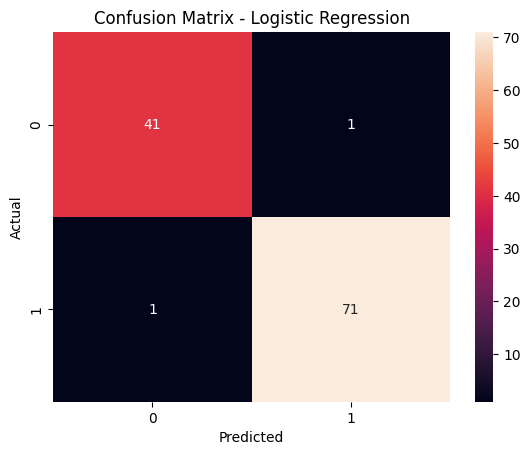

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_log)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Logistic Regression Results
- Model achieves high accuracy (~96–98%).
- Precision and recall are strong for both classes.
- Confusion matrix shows very few misclassifications.


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")


Decision Tree model trained successfully.


In [12]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", round(accuracy_tree, 4))


Decision Tree Accuracy: 0.9123


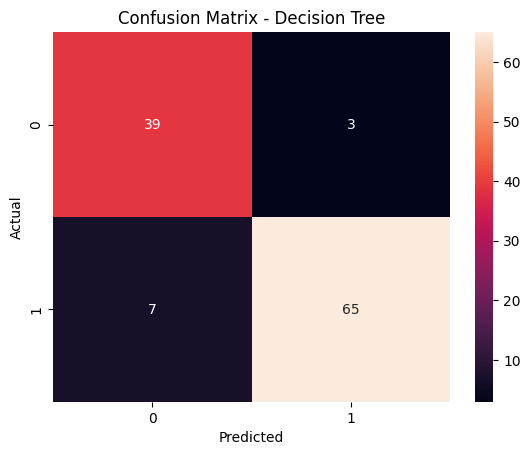

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure()
sns.heatmap(cm_tree, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [15]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_log, accuracy_tree]
})

results


,Model,Accuracy
0,Logistic Regression,0.982456
1,Decision Tree,0.912281


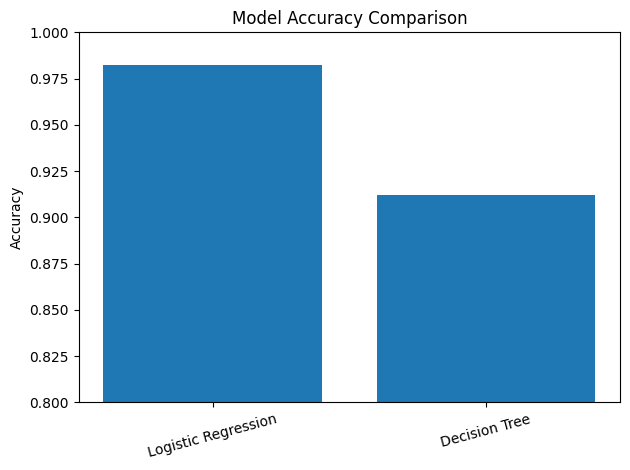

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Model comparison
- Logistic Regression usually performs very well because the data is well-separated after scaling.
- Decision Tree can perform similarly, but may overfit depending on depth.
- We compare both models using accuracy and classification metrics.


In [17]:
import joblib
from pathlib import Path

results_dir = Path("../reports/results")
results_dir.mkdir(parents=True, exist_ok=True)

joblib.dump(log_model, results_dir / "logistic_regression.joblib")
joblib.dump(tree_model, results_dir / "decision_tree.joblib")

print("Saved models to:", results_dir)


Saved models to: ..\reports\results
